In [317]:
import os
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.io import decode_jpeg
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator

In [166]:
parent_dir =  os.path.dirname(os.getcwd())

In [167]:
parent_dir

'C:\\Users\\Kevin\\Documents\\Flatiron\\Phase4_Project'

In [168]:
train_path = os.path.join(parent_dir, 'Data\\train')

In [246]:
train_path

'C:\\Users\\Kevin\\Documents\\Flatiron\\Phase4_Project\\Data\\train'

In [169]:
train_path = os.path.join(parent_dir, 'Data\\train')
test_path = os.path.join(parent_dir, 'Data\\test')

In [170]:
pneumonia_filenames = os.listdir(os.path.join(train_path, 'pneumonia'))
normal_filenames = os.listdir(os.path.join(train_path, 'normal'))

In [171]:
img = 'C:\\Users\\Kevin\\Documents\\Flatiron\\Phase4_Project\\Data\\train\\NORMAL\\NORMAL-28501-0001.jpeg'

In [245]:
os.getcwd()

'C:\\Users\\Kevin\\Documents\\Flatiron\\Phase4_Project\\scratch notebooks'

In [172]:
image = Image.open(img)

In [208]:
tf_image = np.array(image).astype('uint8')

In [212]:
x, y = tf_image.shape

In [213]:
tf_image = tf_image.reshape(1,x,y,1).astype('float32')

In [214]:
tf_image.shape

(1, 2418, 2434, 1)

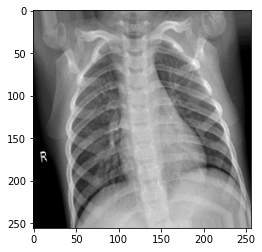

In [239]:
plt.imshow(next(aug_iter)[0][0], cmap='gray')

In [249]:
train_path

'C:\\Users\\Kevin\\Documents\\Flatiron\\Phase4_Project\\Data\\train'

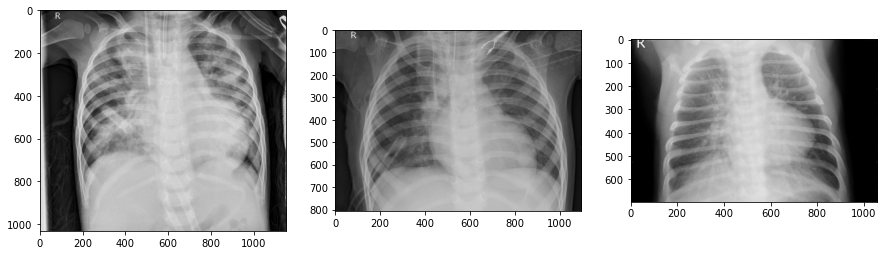

In [260]:
plt.figure(figsize=(15,15))
for i in range(3):
    filename = pneumonia_filenames[i]
    img_addr = train_path + '\\PNEUMONIA\\' + filename
    img = Image.open(img_addr)
    ax = plt.subplot(1,3,i+1)
    plt.imshow(img, cmap='gray')

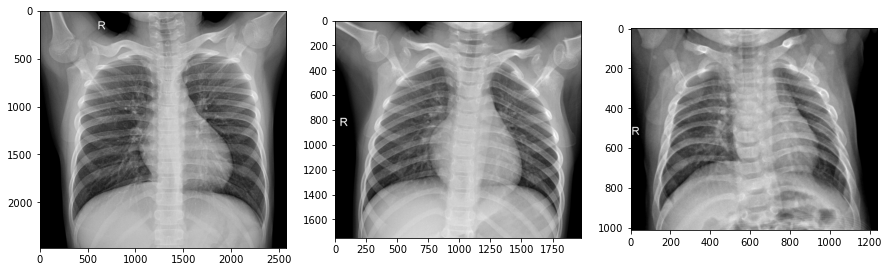

In [262]:
plt.figure(figsize=(15,15))
for i in range(3):
    filename = normal_filenames[i]
    img_addr = train_path + '\\NORMAL\\' + filename
    img = Image.open(img_addr)
    ax = plt.subplot(1,3,i+1)
    plt.imshow(img, cmap='gray')

In [341]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size, class_mode='binary',
                                                  color_mode='grayscale')

Found 624 images belonging to 2 classes.


----
Found 4187 images belonging to 2 classes.
----
Found 1045 images belonging to 2 classes.
----
Found 5232 images belonging to 2 classes.
----


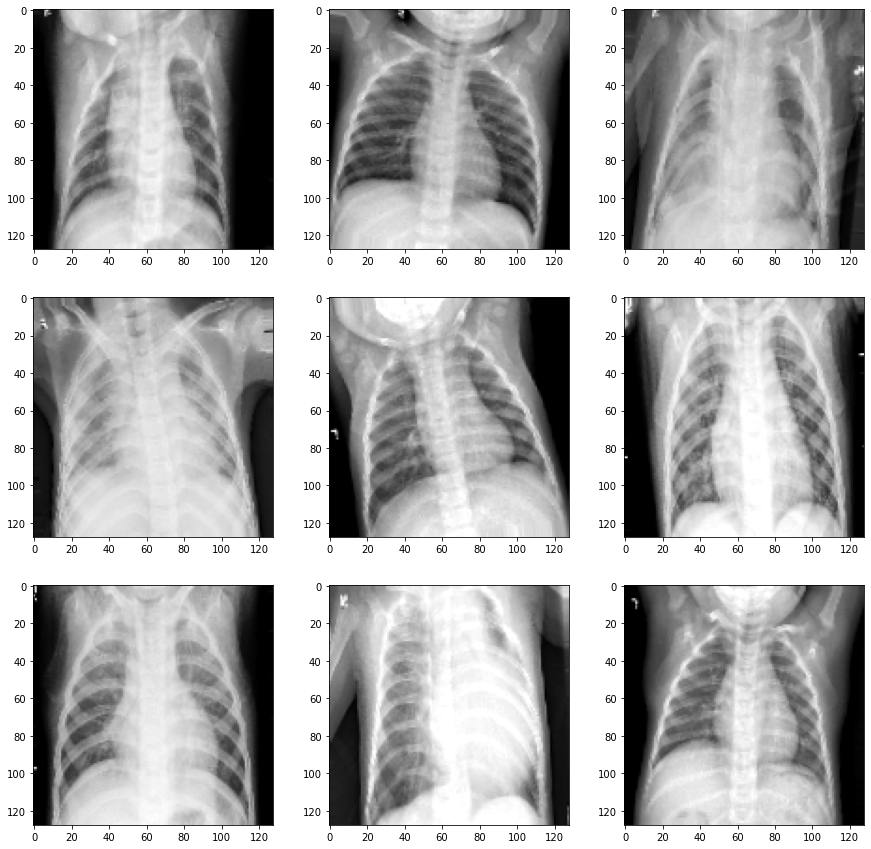

In [301]:
img_size = (128,128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)
print('----')
aug_iter = train_datagen.flow_from_directory(train_path, target_size=(128,128), color_mode='grayscale')
print('----')

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        image, label = next(aug_iter)[0][0]
        ax[i][j].imshow(image, cmap='gray')
        ax.set(title=f"Label: {label})
#         ax[i][j].axis('off')

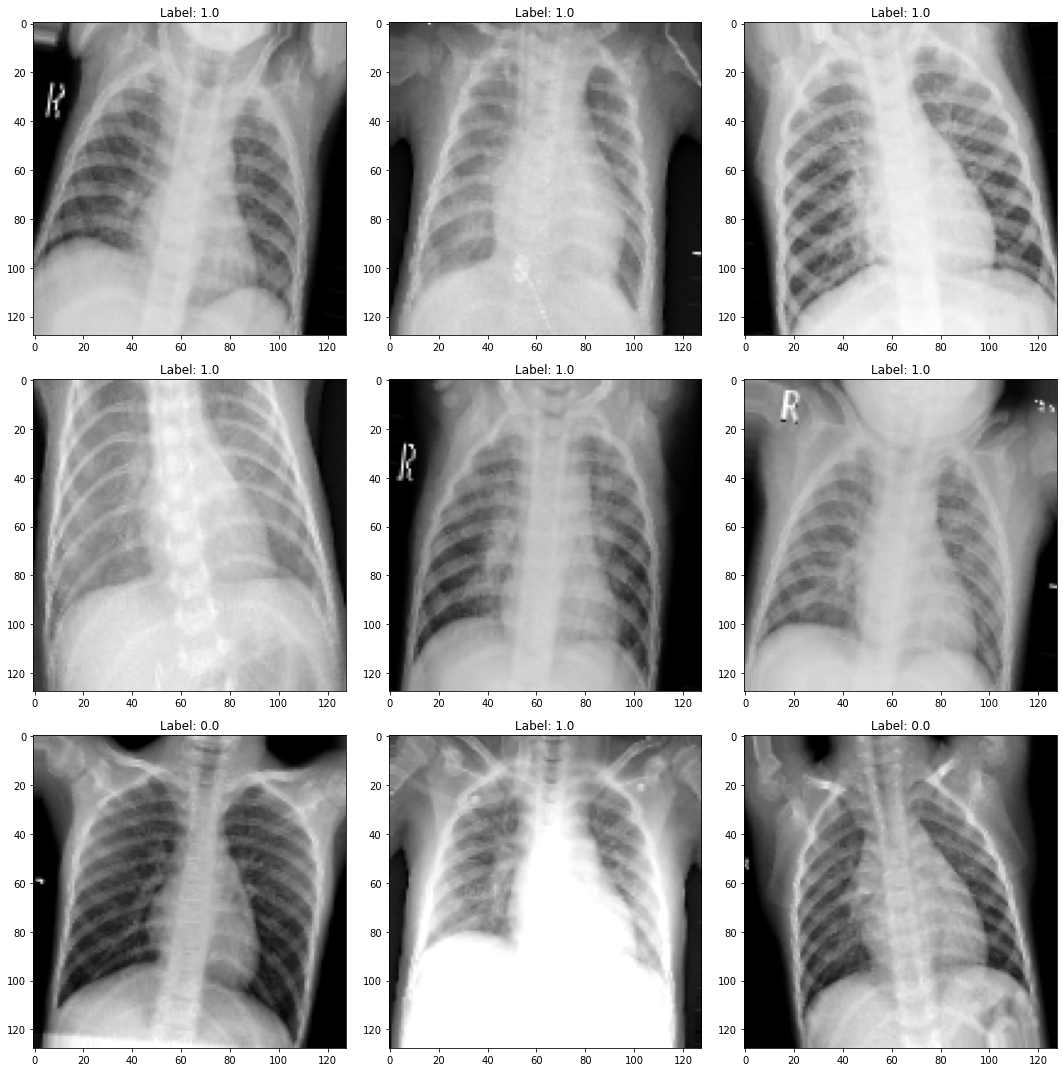

In [306]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    img, label = train_generator.next()
    ax.imshow(img[0], cmap='gray')
    ax.set(title=f"Label: {label[0]}")
plt.tight_layout()
plt.show()

In [ ]:
# model.add(Dense(batch_size, activation='relu', input_dim=img_size[0]*img_size[1]))

In [325]:
model = Sequential(name='Model1')

In [326]:
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
model.fit(train_generator, epochs=50, workers=8, validation_data=val_generator, validation_steps=100//32)

In [334]:
model.summary()

Model: "Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 128)     1280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32113

In [337]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'],)

In [340]:
model.fit(train_generator, epochs=50, workers=8, validation_data=val_generator, validation_steps=100//32)

Epoch 1/50
131/131 [==============================] - 70s 534ms/step - loss: 0.1565 - recall: 0.9607 - val_loss: 0.2286 - val_recall: 0.9143
Epoch 2/50
131/131 [==============================] - 70s 534ms/step - loss: 0.1324 - recall: 0.9672 - val_loss: 0.0853 - val_recall: 0.9726
Epoch 3/50
131/131 [==============================] - 70s 535ms/step - loss: 0.1281 - recall: 0.9691 - val_loss: 0.0917 - val_recall: 1.0000
Epoch 4/50
131/131 [==============================] - 70s 533ms/step - loss: 0.1128 - recall: 0.9730 - val_loss: 0.1145 - val_recall: 0.9385
Epoch 5/50
131/131 [==============================] - 70s 536ms/step - loss: 0.1050 - recall: 0.9752 - val_loss: 0.1348 - val_recall: 0.9583
Epoch 6/50
131/131 [==============================] - 70s 532ms/step - loss: 0.1640 - recall: 0.9640 - val_loss: 0.1236 - val_recall: 0.9342
Epoch 7/50
131/131 [==============================] - 70s 534ms/step - loss: 0.1125 - recall: 0.9691 - val_loss: 0.0995 - val_recall: 0.9848
Epoch 8/50
13

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
model.fit(train_generator, epochs=50, workers=8, validation_data=val_generator, validation_steps=100//32)

In [342]:
model.evaluate(test_generator)

20/20 [==============================] - 5s 233ms/step - loss: 1.2771 - recall: 0.9872


[1.2771357297897339, 0.9871794581413269]